# EDA

## Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_csv("cian_rent.csv")


print(df.head())


print(df.info())


print(df.describe())

   author    author_type  agent_name  \
0     NaN  realtor_based         NaN   
1     NaN  realtor_based         NaN   
2     NaN  realtor_based         NaN   
3     NaN  realtor_based         NaN   
4     NaN  realtor_based         NaN   

                                        url location  deal_type  \
0  https://www.cian.ru/rent/flat/319524074/   Москва  rent_long   
1  https://www.cian.ru/rent/flat/313850443/   Москва  rent_long   
2  https://www.cian.ru/rent/flat/317523322/   Москва  rent_long   
3  https://www.cian.ru/rent/flat/316058969/   Москва  rent_long   
4  https://www.cian.ru/rent/flat/319463100/   Москва  rent_long   

  accommodation_type     price  year_of_construction house_material_type  ...  \
0               flat  290300.0                   NaN       monolithBrick  ...   
1               flat  200600.0                2005.0               panel  ...   
2               flat   84300.0                1960.0               panel  ...   
3               flat   79800.0  

In [23]:
df.head()

,author_type,url,location,deal_type,accommodation_type,price,year_of_construction,house_material_type,living_meters,floors_count,underground,creation_date,price_per_m2,underground_list,month,metro_count
2,realtor_based,https://www.cian.ru/rent/flat/317523322/,Москва,rent_long,flat,84300.0,1960.0,panel,25.0,5,"Ломоносовский проспект, Минская, Минская",2025-05-14,3372.000000,"[Ломоносовский проспект, Минская, Минская]",5,3.0
3,realtor_based,https://www.cian.ru/rent/flat/316058969/,Москва,rent_long,flat,79800.0,2024.0,panel,18.0,24,"Бульвар Генерала Карбышева, Серебряный Бор, Щу...",2025-04-09,4433.333333,"[Бульвар Генерала Карбышева, Серебряный Бор, Щ...",4,3.0
4,realtor_based,https://www.cian.ru/rent/flat/319463100/,Москва,rent_long,flat,95200.0,2022.0,monolith,18.0,25,"Октябрьское поле, Бульвар Генерала Карбышева, ...",2025-07-05,5288.888889,"[Октябрьское поле, Бульвар Генерала Карбышева,...",7,3.0
5,realtor_based,https://www.cian.ru/rent/flat/319554040/,Москва,rent_long,flat,89500.0,2006.0,panel,28.7,17,"Ховрино, Ховрино, Грачёвская",2025-07-08,3118.466899,"[Ховрино, Ховрино, Грачёвская]",7,3.0
6,realtor_based,https://www.cian.ru/rent/flat/315551205/,Москва,rent_long,flat,90000.0,2024.0,unknown,30.0,28,Щукинская,2025-03-28,3000.000000,[Щукинская],3,1.0


## Обработка пропущенных значений

In [2]:
df.dropna(axis=1, how='all', inplace=True)

numeric_cols = ['price', 'living_meters', 'floors_count']
for col in numeric_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

categorical_cols = ['house_material_type', 'heating_type', 'district']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna('unknown')
      
df = df.dropna(subset=['price', 'living_meters'], how='any')

df.head(3)

,author_type,url,location,deal_type,accommodation_type,price,year_of_construction,house_material_type,living_meters,floors_count,underground,creation_date
0,realtor_based,https://www.cian.ru/rent/flat/319524074/,Москва,rent_long,flat,290300.0,NaN,monolithBrick,60.1,28,"Багратионовская, Парк Победы, Филёвский парк",2025-07-08
1,realtor_based,https://www.cian.ru/rent/flat/313850443/,Москва,rent_long,flat,200600.0,2005.0,panel,53.3,22,"Поклонная, Ломоносовский проспект, Киевская",2025-02-18
2,realtor_based,https://www.cian.ru/rent/flat/317523322/,Москва,rent_long,flat,84300.0,1960.0,panel,25.0,5,"Ломоносовский проспект, Минская, Минская",2025-05-14


## Приведение типов данных

In [3]:
if 'price' in df.columns:
    df['price'] = df['price'].astype(str).str.replace(' ', '').astype(float)

# Дата создания объявления в datetime
if 'creation_date' in df.columns:
    df['creation_date'] = pd.to_datetime(df['creation_date'], errors='coerce')

if 'floors_count' in df.columns:
    df['floors_count'] = df['floors_count'].astype(int)

In [4]:
text_cols = ['district', 'street', 'house_number']
for col in text_cols:
    if col in df.columns:
        df[col] = df[col].str.strip(' "\'')


if 'district' in df.columns:
    df['district'] = df['district'].str.title()

## Обработка аномалий

In [5]:
if 'price' in df.columns:
    df = df[(df['price'] > 20_000) & (df['price'] < 500_000)]

if 'living_meters' in df.columns:
    df = df[(df['living_meters'] > 10) & (df['living_meters'] < 500)]

if 'floor' in df.columns and 'floors_count' in df.columns:
    df['floor'] = np.where(df['floor'] > df['floors_count'], df['floors_count'], df['floor'])

## Разделение сложных полей

In [6]:
if 'floor' in df.columns and 'floors_count' in df.columns:
    df['floor'] = df['floor'].fillna(1)
    
    df['floors_count'] = df['floors_count'].fillna(df['floors_count'].median())
    
    # Преобразуем оба столбца в int
    df['floor'] = df['floor'].astype(int)
    df['floors_count'] = df['floors_count'].astype(int)
    
    df['floor'] = np.where(
        df['floor'] > df['floors_count'],
        df['floors_count'],
        df['floor']
    )

## Анализ категориальных переменных

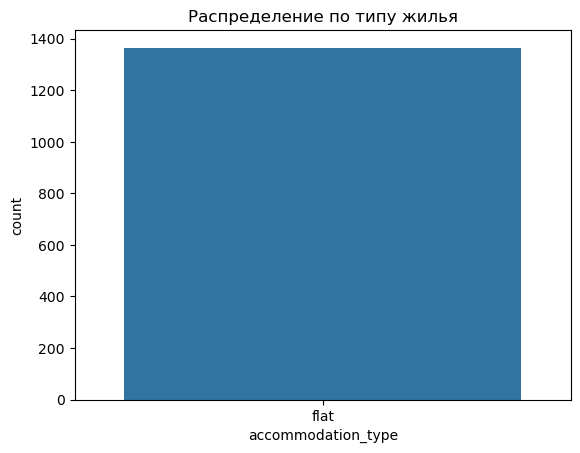

In [7]:
sns.countplot(data=df, x='accommodation_type')
plt.title("Распределение по типу жилья")
plt.show()

Все объявления относятся к квартирам (flat)

### Тип дома

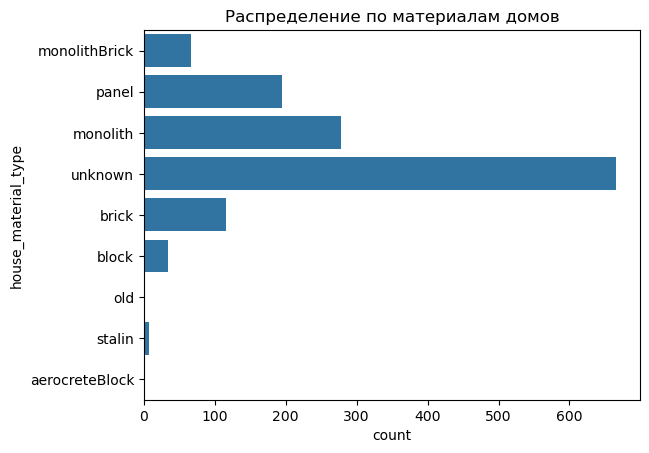

In [8]:
sns.countplot(data=df, y='house_material_type')
plt.title("Распределение по материалам домов")
plt.show()

- Чаще всего встречаются панельные (panel) и монолитные (monolith) дома

- Там где значений нет скорее всего данные отсуствуют

### Метро (топ-10 по количеству)

               count
Москва-Сити      308
Деловой центр    273
Шелепиха         237
Белорусская       84
Аминьевская       75
Тверская          64
Пушкинская        64
Маяковская        60
Чеховская         59
Курская           59


/var/folders/09/t6tn_wqx1ys2v4vlnpydh_4h0000gn/T/ipykernel_3917/999940615.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_districts['count'], y=top_districts.index, palette='viridis')


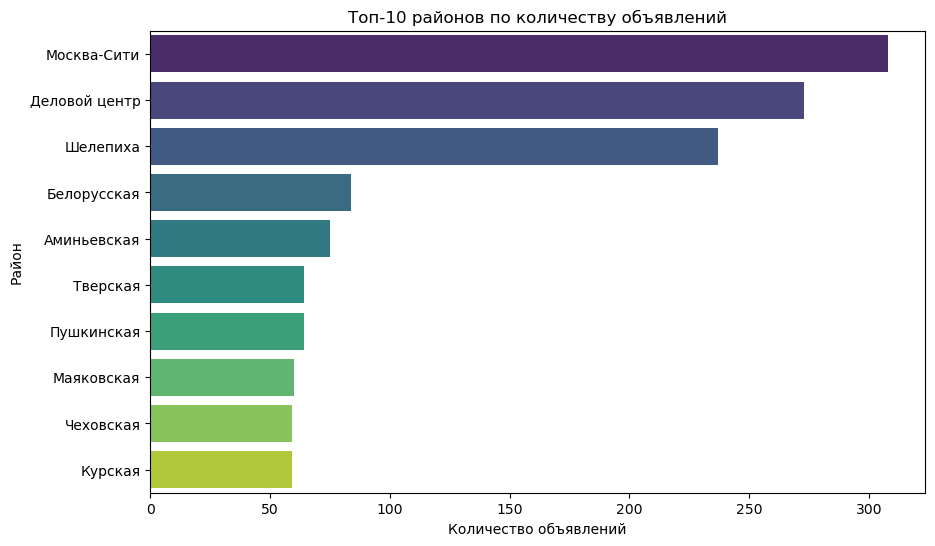

In [9]:
from collections import Counter

all_districts = []
for districts in df['underground'].dropna():
    separated = [d.strip() for d in districts.split(',')]
    all_districts.extend(separated)


district_counts = Counter(all_districts)

top_districts = pd.DataFrame.from_dict(district_counts, orient='index', columns=['count'])
top_districts = top_districts.sort_values('count', ascending=False).head(10)

print(top_districts)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_districts['count'], y=top_districts.index, palette='viridis')
plt.title('Топ-10 районов по количеству объявлений')
plt.xlabel('Количество объявлений')
plt.ylabel('Район')
plt.show()

## Анализ числовых переменных

### Распределение цен

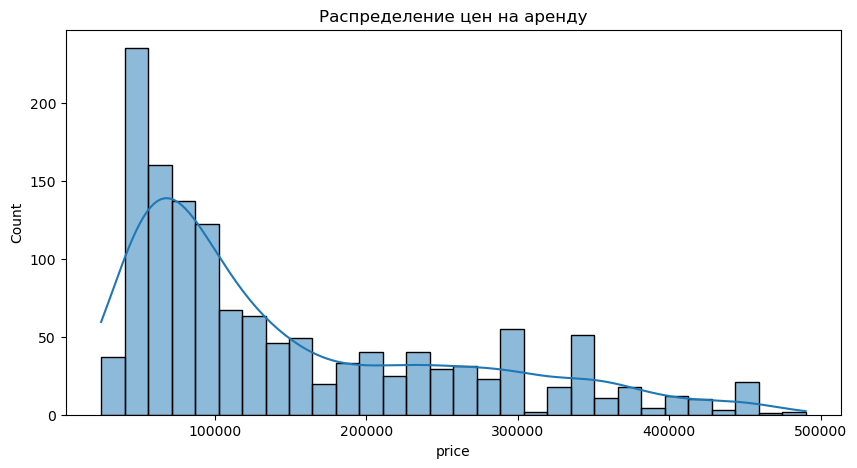

In [10]:
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title("Распределение цен на аренду")
plt.show()

Большинство цен в диапазоне 50–150 тыс. руб., есть выбросы (>400 тыс.)

### Распределение площади 

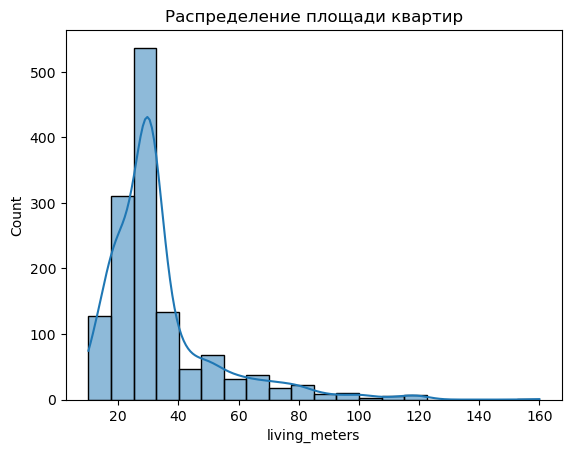

In [11]:
sns.histplot(df['living_meters'], bins=20, kde=True)
plt.title("Распределение площади квартир")
plt.show()

- Основная масса квартир: 20–50 м².

- Есть очень маленькие (<20 м²) и большие (>60 м²) варианты.


### Зависимость цены от площади

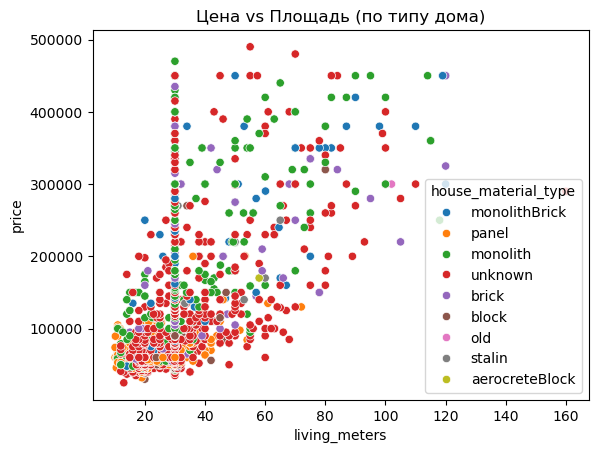

In [12]:
sns.scatterplot(data=df, x='living_meters', y='price', hue='house_material_type')
plt.title("Цена vs Площадь (по типу дома)")
plt.show()

- Чем больше площадь, тем выше цена.

- Монолитные дома в среднем дороже панельных.

## Влияние метро

### Расчет средней цены за м² по станциям

underground_list
Деловой центр        8755.224359
Москва-Сити          8270.041259
Парк Культуры        7742.512276
Арбатская            7694.913247
Площадь Революции    7671.291789
Лубянка              7612.056921
Поклонная            7595.327009
Кузнецкий мост       7570.329727
Охотный ряд          7501.334964
Третьяковская        7473.518917
Name: price_per_m2, dtype: float64


/var/folders/09/t6tn_wqx1ys2v4vlnpydh_4h0000gn/T/ipykernel_3917/3670302368.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_stations.values, y=top_10_stations.index, palette='rocket')


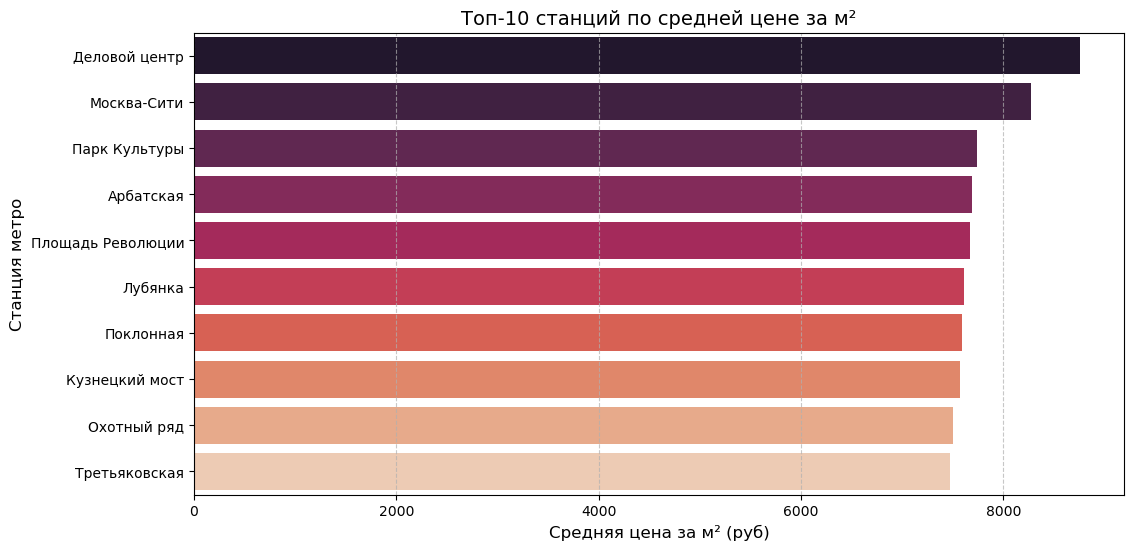

In [13]:
df['price_per_m2'] = df['price'] / df['living_meters']

df['underground_list'] = df['underground'].str.split(',').apply(lambda x: [s.strip() for s in x] if isinstance(x, list) else [])

df_exploded = df.explode('underground_list')

avg_price_per_m2 = df_exploded.groupby('underground_list')['price_per_m2'].mean().sort_values(ascending=False)
print(avg_price_per_m2.head(10))

top_10_stations = avg_price_per_m2.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_stations.values, y=top_10_stations.index, palette='rocket')
plt.title('Топ-10 станций по средней цене за м²', fontsize=14)
plt.xlabel('Средняя цена за м² (руб)', fontsize=12)
plt.ylabel('Станция метро', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## Временной анализ

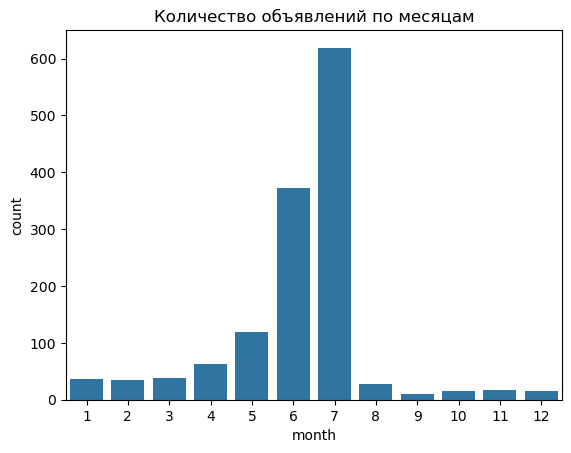

In [14]:
df['creation_date'] = pd.to_datetime(df['creation_date'])
df['month'] = df['creation_date'].dt.month

sns.countplot(data=df, x='month')
plt.title("Количество объявлений по месяцам")
plt.show()

Больше всего объявлений в июле (возможно, сезонный рост)

### Изменение средней цены по месяцам

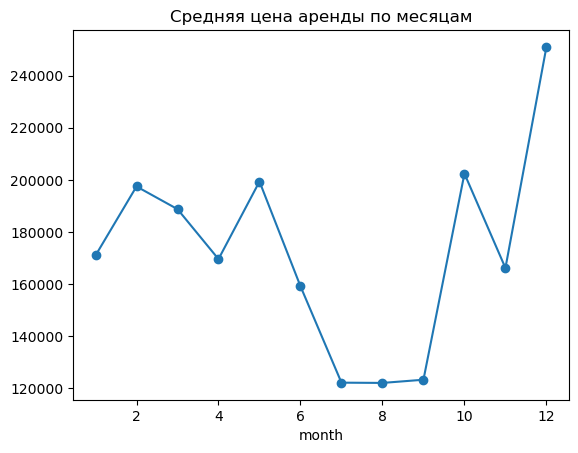

In [15]:
monthly_price = df.groupby('month')['price'].mean()
monthly_price.plot(kind='line', marker='o')
plt.title("Средняя цена аренды по месяцам")
plt.show()

Отрицательный рост цен (июль август сентябрь)


##  Корреляции

### Матрица корреляций

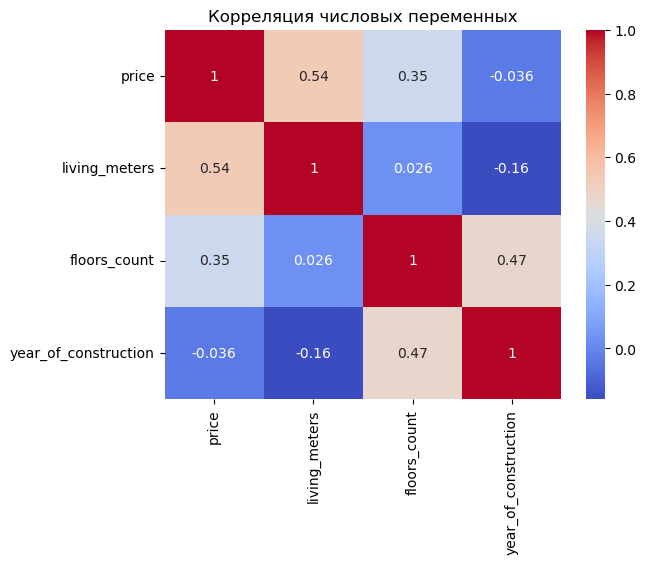

In [16]:
### Матрица корреляций

numerical_cols = ['price', 'living_meters', 'floors_count', 'year_of_construction']
corr_matrix = df[numerical_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Корреляция числовых переменных")
plt.show()

- Сильная корреляция: price и living_meters (чем больше площадь, тем выше цена).

- Слабая корреляция: year_of_construction и price (новостройки могут быть дороже).


## Выбросы

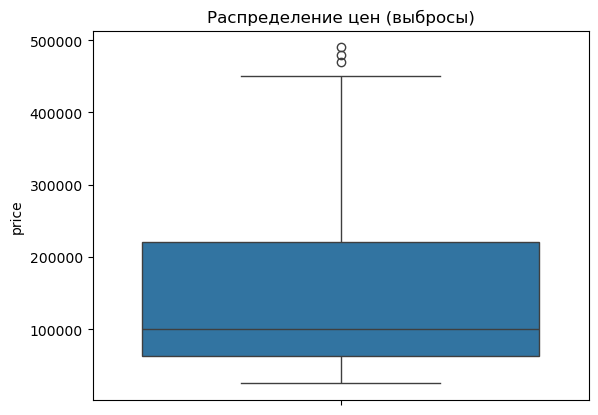

In [17]:
sns.boxplot(data=df, y='price')
plt.title("Распределение цен (выбросы)")
plt.show()

Выбросы: цены >450к


# Машинное обучение

### Предсказание цены аренды (Регрессия)

Признаки:

living_meters (площадь)

house_material_type (тип дома)

floors_count (этажность)

year_of_construction (год постройки)

metro_count (количество станций метро рядом)

underground (список станций)

In [18]:
#Количество метро у каждого дома
df['metro_count'] = df['underground'].str.split(', ').str.len()

### Обработка nan значений

In [19]:
print(df.isna().sum())

author_type               0
url                       0
location                  0
deal_type                 0
accommodation_type        0
price                     0
year_of_construction    749
house_material_type       0
living_meters             0
floors_count              0
underground               3
creation_date             0
price_per_m2              0
underground_list          0
month                     0
metro_count               3
dtype: int64


In [20]:
median_year = df['year_of_construction'].median()
df['year_of_construction'] = df['year_of_construction'].fillna(median_year)

df = df.dropna(subset=['underground'])
print(df.isna().sum())


author_type             0
url                     0
location                0
deal_type               0
accommodation_type      0
price                   0
year_of_construction    0
house_material_type     0
living_meters           0
floors_count            0
underground             0
creation_date           0
price_per_m2            0
underground_list        0
month                   0
metro_count             0
dtype: int64


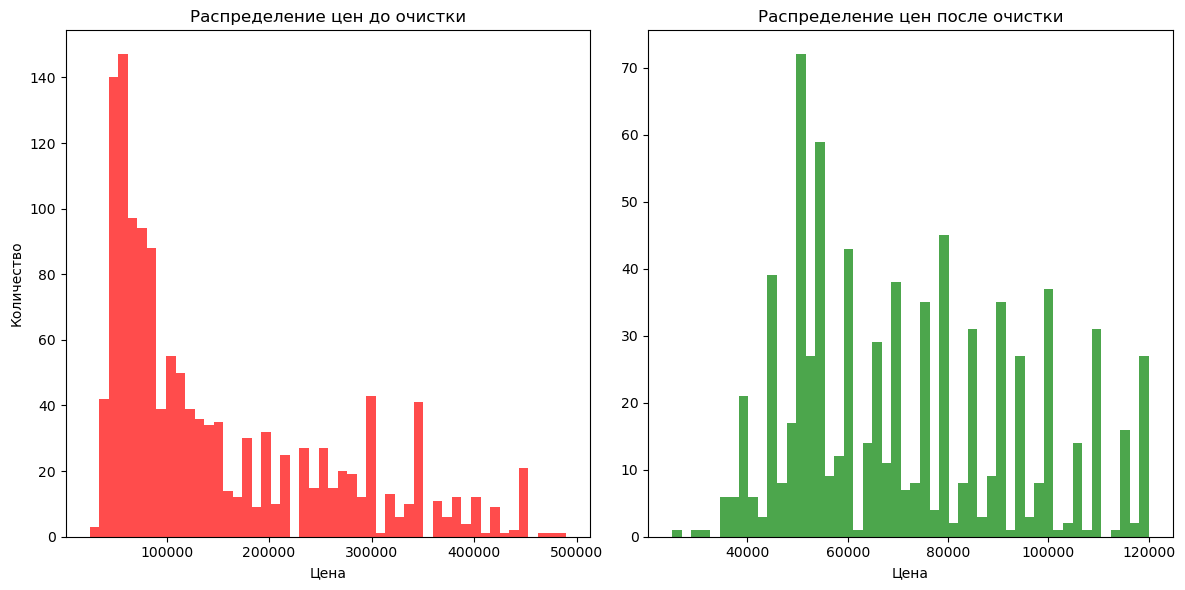

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['price'], bins=50, color='red', alpha=0.7)
plt.title('Распределение цен до очистки')
plt.xlabel('Цена')
plt.ylabel('Количество')


df = df[df['price'] <= 120_000].copy()
plt.subplot(1, 2, 2)
plt.hist(df['price'], bins=50, color='green', alpha=0.7)
plt.title('Распределение цен после очистки')
plt.xlabel('Цена')

plt.tight_layout()
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = df[['living_meters', 'floors_count',  'year_of_construction',
        'metro_count', 'house_material_type', 'underground']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# pipeline
numeric_features = ['living_meters', 'floors_count', 'metro_count', 'year_of_construction'] 
categorical_features = ['house_material_type', 'underground']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=200, random_state=42))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred):.2f} руб.')
print(f'R2 Score: {r2_score(y_test, y_pred):.2f}')


MAE: 11200.13 руб.
R2 Score: 0.55


Модель неплохая, однако нужно собрать больше данных с сайта циан